In [ ]:
"""
다중 회귀 
여러 개의 특성(값)을 사용한 선형 회귀를 다중 회귀

특성이 2개면 선형 회귀는 평면을 학습함

농어의 길이뿐만 아니라 농어의 높이와 두께도 함께 사용함

이전 절에서 처럼 3개의 특성을 각각 제곱하여 추가함

거기다가 각 특성을 서로 곱해서 또 다른 특성을 만듬

즉 농어 길이 X 농어 높이 를 새로운 특성으로 만드는 것

이렇게 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 -특성 공학-

"""

In [1]:
"""
데이터 준비

판다스 유명한 데이터 분석 라이브러리를 사용
데이터프레임은 판다스의 핵심 데이터 구조

https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv

csv 파일을 데이터프레임으로 받아서 넘파이 배열로 변환하여 선형 회귀 모델을 훈련

농어의 길이, 높이, 두께가 있는 csv파일
"""
import pandas as pd 
df = pd.read_csv("https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv")
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
perch_full, perch_weight, random_state=42)

In [4]:
"""
사이킷런의 변환기

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공
사이킷런에서는 이런 클래스를 변환기 라고 부름
fit(), transform() 메서드를 제공

여기서 사용할 변환기는 PolynomialFeatures 클래스
"""
from sklearn.preprocessing import PolynomialFeatures

"""
예시로 
2개의 특성 2와3으로 이루어진 샘플 하나를 적용

이 클래스의 객체를 만든 다음 fit(), transform()메서드를 차례대로 호출
"""
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [5]:
"""
fit() 메서드는 새롭게 만들 특성 조합을 찾고
transform() 메서드는 실제로 데이터를 변환
[[2, 3]]을 넣었는데 
transform()에서는 [[2, 3]]을 
선형 모델은 자동으로 절편을 추가 해서 [[1,2,3,...]]
이렇게 1이 추가 된거고
4와 9는 2와 3을 제곱한 값
6은 2와3을 곱한값
이렇게 fit()이 특성 조합을 찾고
transform()이 실제로 데이터로 변환 해주었다

사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요가 없다
include_bias = False로 지정하여 다시 특성을 변환
"""
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [6]:
"""
이제 이 방식으로 train_input에 적용
"""
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [7]:
print(train_input.shape)
print(train_input)
print(train_poly)

(42, 3)
[[19.6   5.14  3.04]
 [22.    5.88  3.52]
 [18.7   5.2   3.12]
 [17.4   4.59  2.94]
 [36.   10.61  6.74]
 [25.    6.44  3.68]
 [40.   11.93  7.11]
 [39.   12.43  7.35]
 [43.   11.93  7.28]
 [22.    5.64  3.52]
 [20.    5.08  2.77]
 [22.    6.11  3.52]
 [24.    7.29  3.72]
 [27.5   7.17  4.34]
 [43.   12.51  7.42]
 [40.   11.73  7.22]
 [24.    6.38  3.82]
 [21.    5.92  3.31]
 [27.5   7.05  4.34]
 [40.   12.38  7.46]
 [32.8  10.03  6.02]
 [26.5   7.17  4.14]
 [36.5  10.88  6.86]
 [13.7   3.53  2.  ]
 [22.7   5.95  3.63]
 [15.    3.82  2.43]
 [37.   10.57  6.37]
 [35.   11.49  7.8 ]
 [28.7   7.59  4.64]
 [23.5   6.28  3.72]
 [39.   11.14  6.  ]
 [21.    5.69  3.56]
 [23.    5.22  3.63]
 [22.    5.52  4.  ]
 [44.   12.49  7.6 ]
 [22.5   6.79  3.62]
 [19.    5.64  3.05]
 [37.   10.84  6.26]
 [22.    6.11  3.41]
 [25.6   6.56  4.24]
 [42.   12.8   6.87]
 [34.5  10.26  6.39]]
[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.       

In [8]:
"""
PolynomialFeatures 클래스는 9개의 특성이 어떻게 만들어졌는지 확인할 수 있다
get_feature_names() 메서드를 호출하면 9개의 특성이 각각 어떤 입력의 조합인지 확인
"""
poly.get_feature_names()

c:\programdata\anaconda3\envs\tensor1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [9]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [10]:
test_poly = poly.transform(test_input)

In [11]:
print(test_poly.shape)

(14, 9)


In [12]:
"""
다중 회귀 모델 훈련하기

다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같다
사이킷런의 LinearRegression 클래스를 임포트하고 앞에서 만든 train_poly를 사용해 
모델을 훈련
"""
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [13]:
"""
농어의 길이뿐만 아니라 높이와 두께를 모두 사용했고 
각 특성을 제곱하거나 서로 곱해서 다항 특성을 더 추가함
특성이 늘어나면 선형 회귀의 능력은 매우 강해짐
"""
print(lr.score(train_poly, train_target))

0.9903183436982124


In [14]:
"""
테스트 세트에 대한 점수는 높아지지 않았지만 농어의 길이만 사용했을 때 있던 
과소적합 문제는 더이상 나타나지 않았습니다
"""
print(lr.score(test_poly, test_target))

0.9714559911594087


In [15]:
"""
특성을 더 추가함
3제곱, 4제곱항을 넣어본다
PolynomialFeatures 클래스의 degree 매개변수를 사용하여 
필요한 고차항의 최대 차수를 지정함
5제곱까지 특성을 만들어 출력
"""
poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [16]:
"""
만들어진 특성의 개수는 55개 
선형 모델에 훈련
"""
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999994632


In [17]:
"""
아주 큰 음수 
즉 모델은 훈련세트에 너무 과대 적합이 일어남
특성을 조절해야함
"""
print(lr.score(test_poly, test_target))

-144.40578108808137


In [18]:
"""
규제
규제는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 
훼방하는것을 말함

즉 모델이 훈련 세트에 과대적합되지 않도록 만드는 것

특성의 스케일에 대해 생각을 해야함 
특성의 스케일을 정규화 해야함

사이킷런에서 제공하는 StandardScaler 클래스를 사용
"""
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [19]:
"""
먼제 StandardScaler 클래스의 객체 ss를 초기화한 후 PolynomialFeatures 클래스로 만든
train_poly를 사용해 이 객체를 훈련함
꼭 훈련세트로 학습한 변환기를 사용해 테스트 세트까지 변환해야 함
이제 표준점수로 변환한 train_scaled 와 test_scaled 가 준비됨

선형 회귀 모델에 규제를 추가한 모델을 릿지ridge와 라쏘lasso 라고 부름
릿지는 계수를 제곱한 값을 기준으로 규제를 적용
라쏘는 계수의 절댓값을 기준으로 규제를 적용
일반적으로 릿지를 선호


"""
# 테서트용 확인
print(train_scaled)
print(test_scaled)

[[-1.01339619 -1.01007487 -1.01952321 ... -0.76449499 -0.75967179
  -0.75143746]
 [-0.73842893 -0.75254307 -0.74466913 ... -0.73198449 -0.72731765
  -0.71950111]
 [-1.11650891 -0.98919391 -0.97371419 ... -0.76114089 -0.75592147
  -0.74734146]
 ...
 [-0.32597805 -0.51589222 -0.33238802 ... -0.65673421 -0.64237495
  -0.62509499]
 [ 1.55296488  1.65572732  1.17358328 ...  1.45958191  1.19906225
   0.95977016]
 [ 0.6936922   0.7717668   0.8987292  ...  0.3701756   0.40321427
   0.43089551]]
[[-2.29657672 -2.0645632  -1.95288184 -1.55255604 -1.46585499 -1.45227925
  -1.38306012 -1.36853915 -1.3414385  -1.16487216 -1.12766176 -1.12993021
  -1.09096504 -1.0919529  -1.08681842 -1.05473034 -1.05422049 -1.04733556
  -1.03445922 -0.95097661 -0.93581382 -0.94095847 -0.92003743 -0.92481854
  -0.9257405  -0.90344054 -0.9076728  -0.90768173 -0.90365223 -0.88585964
  -0.88933355 -0.8882214  -0.88265495 -0.87279092 -0.82345261 -0.81922614
  -0.82441462 -0.81401521 -0.81951597 -0.82223805 -0.80760074 -0

In [20]:
"""
릿지 회귀

릿지와 라쏘 모두 sklearn.linear_model 패키지 안에 있다
모델 객체를 만들고 fit()메서드에서 훈련한 다음 score()메서드로 평가함
"""
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [21]:
"""
테스트 점수 확인
테스트 세트 점수가 정상으로 나옴
많은 특성을 사용했음에도 불구하고 훈련세트에 과대적합되지 않아 테스트 세트에서도 좋은 성능을 나타냄
"""
print(ridge.score(test_scaled, test_target))

0.9790693977615383


In [25]:
"""
릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다
모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절함
alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소 적합 되도록 유도
alpha 값이 작으면 계슈를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대 적합될 가능성이 크다

적적한 alpha 값을 찾는 한가지 방법은 alpha 값에 대한 R2값의 그래프를 그려보는것
훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 됨
"""
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [26]:
"""
alpha 값을 0.001에서 100 까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 
훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장
"""
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha = alpha)
    # 릿지 모델을 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

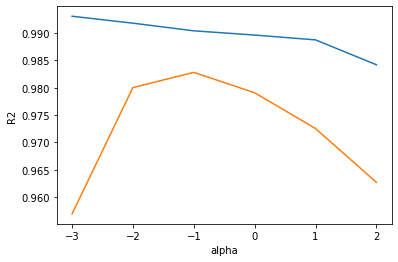

In [27]:
"""
그래프 생성
alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현
즉 0.001 은 -3, 0.01 은 -2
"""
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R2")
plt.show()

In [28]:
"""
위는 훈련 세트 그래프, 아래는 테스트 세트 그래프

적잘한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1, 즉 0.1임

"""
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465387024


In [29]:
"""
라쏘 회귀
Ridge 클래스를 Lasso 클래스로 바꾸는 것이 전부
"""
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [30]:
"""
과대 적합을 잘 억제한 결과 
테스트 점수 확인
"""
print(lasso.score(test_scaled, test_target))

0.9800593698421886


In [31]:
"""
alpha 값을 변경하면서 
훈련세트와 테스트 세트에 대한 점수를 계산

지정한 반복횟수가 부족하다고 경고를 나타냄
경고발생하지만 괜찮다
max_iter를 10000으로 해서 큰 문제는 없다

"""
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델 생성
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

c:\programdata\anaconda3\envs\tensor1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\programdata\anaconda3\envs\tensor1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


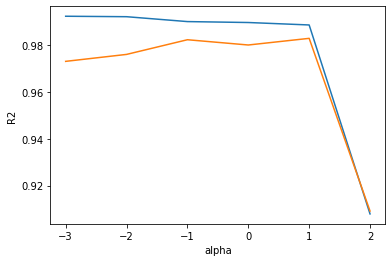

In [32]:
"""
그래프 생성

alpha 값이 작을때는 과대적합
alpha 값이 커지니까 모델이 과소적합이 일어남

적잘한 alpha 값은 10
"""
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R2")
plt.show()

In [33]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131866
0.9824470598706696


In [34]:
"""
라쏘 모델은 계수 값을 아예 0 으로 만들수 있다
라쏘 모델의 계수는 coef_ 속성에 저장되어 있다
이중에 0 인것을 확인

55개의 특성을 모델에 주입했지만 라쏘 모델이 사용한 특성은 15개뿐
"""
print(np.sum(lasso.coef_ ==0))

40
